# Práctica 1

Autor: Blanca Cano Camarero  DGIIM  
Grupo: 2  
Fecha: Octubre 2021  


In [4]:
# Configuración previa 
# modulos utilizados
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

# path carpeta con imágenes
path = './media'

# Assets 

def Normaliza(array):
    return np.array(array) /np.sum(array)

''' utilizar la convolución 
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
def Convolucion1D(f, g): 
    ''' 
    Esta función calcula la convolución de g con f 
    f array 
        g kernel de convolucion
    '''
    g_inv = g[::-1]
    longitud = len(f) + len(g) -1  # tamaño del array convolucionado 
    f_convolucionada = np.zeros( len(f)+ 2*)    
a = [1,2,3]

'''


[3, 2, 1]

# Ejercicio 1 
USANDO SOLO FUNCIONES BÁSICAS DE OPENCV, escribir funciones Python que implementen de forma eficiente el cálculo de los siguientes puntos. 

## Ejercicio 1A

Considere la función Gaussiana 1D de media 0 y desviación típica σ.   
[] Calcular las máscaras discretas 1D de la función Gaussiana,  
[] la derivada de la Gaussiana   
[] y la segunda derivada de la Gaussiana.   

La función implementada debe considerar que tanto el valor de σ como el tamaño
de la máscara son posibles entradas alternativas a la función. Represente en ejes cartesianos
las máscaras obtenidas como funciones 1D y 
[] compare sus formas con las máscaras dadas por la función de OpenCV getDerivKernels para los mismos tamaños de máscara. Use los tamaños
5, 7 y 9.

### Solución 
El tamaño del array unidimensional de nuestra máscara es $T = 2 ceil(3 \sigma) + 1$
La función Gaussiana es de la forma 
$$G(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}}$$

Puesto que nuestra máscara es un array de las imágenes de $G$ evaluadas en $\{ -k, (-k+1), ..., 0, 1..., k \}$ con $k$ cumpliendo que $2k+1 = T$ y que deben de sumar uno. 

Podemos obviar la constante que acompaña al término ya que si $S = \sum_{i=-k}^k c G(k)$ sacamos factor común $c$... 

Todo: ¿Las derivas sí que deberían de llevar constantes? ¿Suma cero? ¿Qué significa?
La derivada de la Gaussiana sería 
$$\frac{d G(x)}{dx} = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2\sigma^2}}(-\frac{x}{\sigma^2})$$
Que obviando las constantes quedaría 

$dG(x) = e^{-\frac{x^2}{2\sigma^2}}(-x)$

La segunda derivada sería de la forma

$$\frac{d^2 G(x)}{(dx)^2} =\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}}(-\frac{2}{\sigma^2}) \left(1-\frac{2x^2}{\sigma^2} \right)$$

Que sin constantes quedaría de la forma
$e^{-\frac{x^2}{2\sigma^2}}\left(1-\frac{2x^2}{\sigma^2} \right)$ 

Para la comparación usaremos la función `cv2.getDerivKernels`

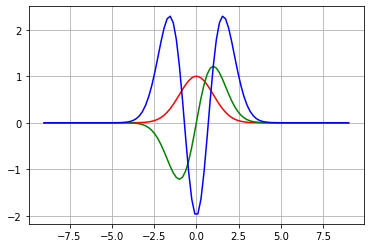

____Máscara gaussiana de orden 0___
Máscara Gaussiana


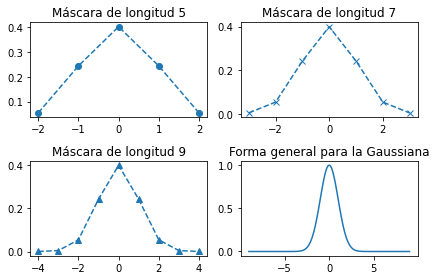

Comparativa con getDerivKernels


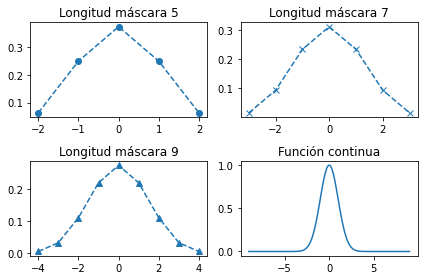

____Máscara gaussiana de orden 1___
Máscara Gaussiana primera derivada


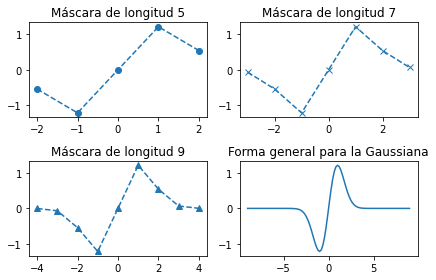

Comparativa con getDerivKernels


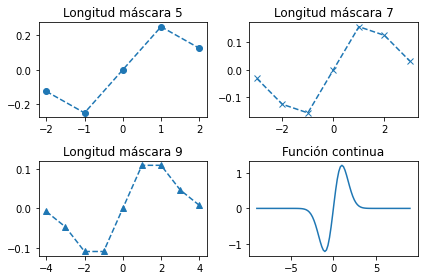

____Máscara gaussiana de orden 2___
Máscara Gaussiana segunda derivada


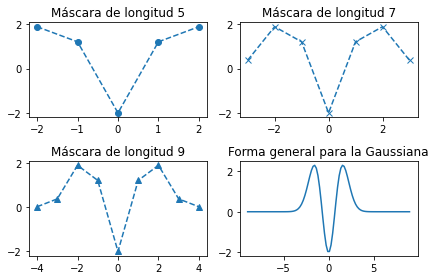

Comparativa con getDerivKernels


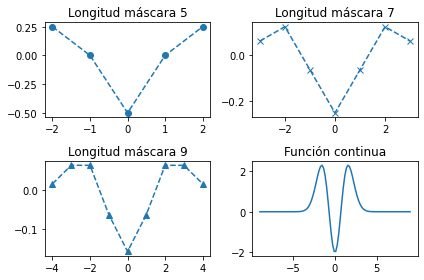

In [2]:
# Declaración de la Gaussiana y su derivada primera y segunda
def Gaussiana (x: float, desviacion_tipica : float):
    return np.exp( - x**2 /(2* desviacion_tipica**2))

def DerivadaPrimeraGaussiana (x: float, desviacion_tipica : float)->list:
    return Gaussiana (x, desviacion_tipica)* 2*x

def DerivadaSegundaGaussiana (x: float, desviacion_tipica : float)->list:
    return np.exp( - x**2 /(2* desviacion_tipica**2))* (4*x**2 -2)

# Representación 
# Rango de valores
inferior = -9
superior = 9
puntos = 100
colores=['r', 'g', 'b']
x_valores = np.linspace(inferior, superior, puntos)
FUNCIONES = [Gaussiana, DerivadaPrimeraGaussiana, DerivadaSegundaGaussiana]
# Relizamos los mapeos de los valores
sigma = 1.0

y_valores = list([f(x_valores, sigma) for f in FUNCIONES])
# Mostramos los valores usando matplotlib

# Mostramos Gráfico con las funciones que queremos discretizar
fig, ax = plt.subplots()
ax.grid(True, which='both')
list( map(lambda x: plt.plot(x_valores, x[0],x[1]), zip(y_valores, colores)))
plt.show()


    
# Declaración de las funciones para calcular la máscara de tamaño T

def Mascara( f, size:int ):
    ''' Función auxiliar que devuelve estrictamente la máscara
        Devuelve la máscara de f de tamaño size 
        Requisito: size debe ser impar. 
    '''
    k = (size -1)//2
    return [f(i) for i in range(-k,k+1)]

def MascaraGaussiana( desviacion_tipica:float, size:int)-> list:
    '''Máscara Gaussiana de tamaño "size"
    Requisito size debe ser impar 
    '''
    mascara_sin_normalizar = np.array(
        Mascara(lambda x: Gaussiana(x, desviacion_tipica), size),
        np.float64)
    suma = sum(mascara_sin_normalizar)
    return mascara_sin_normalizar/suma

def MascaraDerivadaPrimera(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaPrimeraGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

def MascaraDerivadaSegunda(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaSegundaGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar
##### Función para comparar máscaras de forma visual 
def RangoK (k: int):
    return list(range(-k, k+1))
def ComparaMascaras (listaMascaras,rangos, nombres):
    for i,m in enumerate(listaMascaras): 
        plt.plot(RangoK(rangos[i]), listaMascaras)
        plt.title(nombres[i])
    plt.show()
 
    

#####  Test
sigma = 1.0
lista_desviaciones_tipicas = [1]#, 2.3]
lista_longitudes = [5,7,9]
colores = ['--o', '--x', '--^']
funciones = [
    {'funcion': MascaraGaussiana, 'nombre': 'Máscara Gaussiana', 'derivate order': 0},
    {'funcion': MascaraDerivadaPrimera, 'nombre': 'Máscara Gaussiana primera derivada', 'derivate order': 1},
    {'funcion': MascaraDerivadaSegunda, 'nombre': 'Máscara Gaussiana segunda derivada', 'derivate order': 2},
]
for j,f in enumerate(funciones):
    print(f'____Máscara gaussiana de orden {j}___')
    mascara=f['funcion'] 
    print(f['nombre'])
    fig, ax = plt.subplots(2,2)
    # Mis máscaras
    for i,l in enumerate(lista_longitudes):
        a = mascara(sigma, l)
        b = RangoK(l//2)
        ax[i//2, i%2].plot(b, a, colores[i], label=f'k={l//2}')
        ax[i//2, i%2].set_title(f'Máscara de longitud {l}')
    ax[1,1].plot(x_valores, y_valores[j])
    ax[1,1].set_title('Función continua')
    plt.title('Forma general para la Gaussiana')
    fig.tight_layout()
    plt.show()
    # Máscara opencv
    print('Comparativa con getDerivKernels')
    fig, ax = plt.subplots(2,2)
    for i,l in enumerate(lista_longitudes):
        a = cv.getDerivKernels(j,1,ksize=l, normalize = True)[0]
        b = RangoK(l//2)
        ax[i//2, i%2].plot(b, a, colores[i], label=f'cv.getDerivKernels de longitud={l//2}')
        ax[i//2, i%2].set_title(f'Longitud máscara {l}')
    ax[1,1].plot(x_valores, y_valores[j])
    ax[1,1].set_title('Función continua')
    fig.tight_layout()
    plt.show()



# Ejercicio 1B
[] Calcule las máscaras discretas 1D de longitud 5 y 7 tanto de alisamiento como de derivada de
primer orden generadas a partir de la aproximación binomial de la Gaussiana y la máscara de
derivada de longitud 3.  
[] Ejecute la función cv2.getDerivKernels(0,1,9).   
[] Observe los vectores de salida y compárelos con los previamena = cv.getDerivKernels(i,1,ksize=l, normalize = False)[0]te calculados, ¿Qué relación hay? ¿Qué conclusiones
extrae sobre la aproximación de OpenCV al cálculo de las máscaras de derivadas de primer
orden?

## Solución  

Se parte de la primera binomial 
 1
121 

El cual nos recuerda al del triángulo de Pascal, el cálculo es además recursivo calculable de la forma 

In [3]:
def MascaraBinomialSinNormalizar( longitud:int): 
    n = longitud -1
    return [scipy.special.binom(n, i)  for i in range(n+1)]
 
## Calculamos máscara de alisamiento normalizadas
LONGITUD = [5,7]
alisamiento = dict()
for l in LONGITUD: 
    alisamiento[l]= Normaliza(MascaraBinomialSinNormalizar(l))

    print(f'Máscara alisamiento tamaño   {l}')
    print (alisamiento[l])




Máscara alisamiento tamaño   5
[0.0625 0.25   0.375  0.25   0.0625]
Máscara alisamiento tamaño   7
[0.015625 0.09375  0.234375 0.3125   0.234375 0.09375  0.015625]
